<a href="https://colab.research.google.com/github/crzysab/Projek-DQLab/blob/main/DataScienceProject%3AAnalisisDataCOVID19diDunia%26ASEAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Membaca Data Covid19 di Dunia

In [ ]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

covid_url = "https://dqlab.id/data/covid19_worldwide_2020.json"
df_covid_worldwide = pd.read_json(covid_url)

print("Ukuran dataset: %d kolom dan %d baris.\n" %df_covid_worldwide.shape)
df_covid_worldwide.head()

Ukuran dataset: 61900 kolom dan 6 baris.



,date,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,geo_id
0,2020-03-20,1,0,1,0,TD
1,2020-03-21,0,0,1,0,TD
2,2020-03-22,1,0,2,0,TD
3,2020-03-23,0,0,2,0,TD
4,2020-03-24,0,0,2,0,TD


Mengatur Tanggal sebagai Index

In [ ]:
print("Informasi data frame awal:")
df_covid_worldwide.info()

df_covid_worldwide = df_covid_worldwide.set_index("date").sort_index()

print("\nInformasi data frame setelah set index kolom date:")
df_covid_worldwide.info()

Informasi data frame awal:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 61900 entries, 0 to 61899
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   61900 non-null  datetime64[ns]
 1   daily_confirmed_cases  61900 non-null  int64         
 2   daily_deaths           61900 non-null  int64         
 3   confirmed_cases        61900 non-null  int64         
 4   deaths                 61900 non-null  int64         
 5   geo_id                 61625 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 3.3+ MB

Informasi data frame setelah set index kolom date:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61900 entries, 2019-12-31 to 2020-12-14
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   daily_confirmed_cases  61900 non-null  i

In [ ]:
df_covid_worldwide.head()

,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,geo_id
date,,,,,
2019-12-31,0,0,0,0,IN
2019-12-31,0,0,0,0,IR
2019-12-31,0,0,0,0,PK
2019-12-31,0,0,0,0,AM
2019-12-31,27,0,27,0,CN


Melihat dan Menghapus Missing Value

In [ ]:
print("Jumlah missing value tiap kolom:")
print(df_covid_worldwide.isna().sum())

df_covid_worldwide.dropna(inplace=True)

print("\nJumlah missing value tiap kolom setelah didrop:")
print(df_covid_worldwide.isna().sum())

Jumlah missing value tiap kolom:
daily_confirmed_cases      0
daily_deaths               0
confirmed_cases            0
deaths                     0
geo_id                   275
dtype: int64

Jumlah missing value tiap kolom setelah didrop:
daily_confirmed_cases    0
daily_deaths             0
confirmed_cases          0
deaths                   0
geo_id                   0
dtype: int64


Membaca Data Country dan ID

In [ ]:
countries_url = "https://dqlab.id/data/country_details.json"
df_countries = pd.read_json(countries_url)
df_countries.head()

,geo_id,country_name
0,TD,Chad
1,CU,Cuba
2,FJ,Fiji
3,GU,Guam
4,IR,Iran


Normalisasi Menyatukan DataFrame Covid19 dan Data Negara

In [ ]:
df_covid_denormalized = pd.merge(df_covid_worldwide.reset_index(), df_countries, on="geo_id").set_index("date")
df_covid_denormalized.head()

,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,geo_id,country_name
date,,,,,,
2019-12-31,0,0,0,0,IN,India
2020-01-01,0,0,0,0,IN,India
2020-01-02,0,0,0,0,IN,India
2020-01-03,0,0,0,0,IN,India
2020-01-04,0,0,0,0,IN,India


Melihat Fatality Ratio

In [ ]:
df_covid_denormalized["fatality_ratio"] = df_covid_denormalized["deaths"]/df_covid_denormalized["confirmed_cases"]
df_covid_denormalized.head()

,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,geo_id,country_name,fatality_ratio
date,,,,,,,
2019-12-31,0,0,0,0,IN,India,NaN
2020-01-01,0,0,0,0,IN,India,NaN
2020-01-02,0,0,0,0,IN,India,NaN
2020-01-03,0,0,0,0,IN,India,NaN
2020-01-04,0,0,0,0,IN,India,NaN


20 Fatality Ratio Tertinggi 

In [ ]:
df_top_20_fatality_rate = df_covid_denormalized.sort_values("fatality_ratio", ascending=False).head(20)
df_top_20_fatality_rate[["geo_id","country_name","fatality_ratio"]]

,geo_id,country_name,fatality_ratio
date,,,
2020-03-15,SD,Sudan,1.0
2020-02-20,IR,Iran,1.0
2020-03-16,GT,Guatemala,1.0
2020-03-13,GY,Guyana,1.0
2020-03-18,SD,Sudan,1.0
2020-03-17,SD,Sudan,1.0
2020-03-16,SD,Sudan,1.0
2020-02-03,PH,Philippines,0.5
2020-02-05,PH,Philippines,0.5


Kondisi Fatality Ratio Tertinggi di Bulan Desember 2020

In [ ]:
df_covid_denormalized_desember = df_covid_denormalized.loc["2020-12"].groupby("country_name").sum()

df_covid_denormalized_desember["fatality_ratio"] = df_covid_denormalized_desember["deaths"]/df_covid_denormalized_desember["confirmed_cases"]

df_top_20_fatality_rate_on_desember = df_covid_denormalized_desember.sort_values("fatality_ratio", ascending=False).head(20)
df_top_20_fatality_rate_on_desember["fatality_ratio"]

country_name
Yemen                          0.291403
Mexico                         0.093324
Montserrat                     0.076923
Ecuador                        0.069390
Isle_of_Man                    0.067620
Sudan                          0.066466
Bolivia                        0.061690
Chad                           0.059062
Egypt                          0.057157
Syria                          0.053837
China                          0.051555
Liberia                        0.050050
Iran                           0.048348
Fiji                           0.045752
Guernsey                       0.045117
United_Republic_of_Tanzania    0.041257
Niger                          0.041001
Afghanistan                    0.039826
Peru                           0.037274
United_Kingdom                 0.035493
Name: fatality_ratio, dtype: float64

Visualisasi Fatality Ratio Tertinggi di Bulan Desember 2020

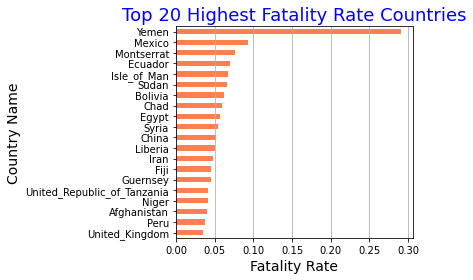

In [ ]:
import matplotlib.pyplot as plt

plt.plot(figsize=(8,8))
df_top_20_fatality_rate_on_desember["fatality_ratio"].sort_values().plot(kind="barh", color="coral")
plt.title("Top 20 Highest Fatality Rate Countries", fontsize=18, color='b')
plt.xlabel("Fatality Rate", fontsize = 14)
plt.ylabel("Country Name", fontsize = 14)
plt.grid(axis="x")
plt.tight_layout()
plt.show()

Kasus Covid-19 di ASEAN

In [ ]:
print("Cek nilai unik di kolom 'country_name':", df_covid_denormalized["country_name"].unique())

Cek nilai unik di kolom 'country_name': ['India' 'Iran' 'Pakistan' 'Armenia' 'China' 'Azerbaijan' 'Algeria'
 'Luxembourg' 'Nepal' 'Malaysia' 'Iceland' 'South_Korea' 'Egypt'
 'United_States_of_America' 'Kuwait' 'Ireland' 'Taiwan' 'San_Marino'
 'Japan' 'Cambodia' 'Lebanon' 'Oman' 'Sweden' 'Philippines' 'Mexico'
 'Italy' 'Switzerland' 'United_Arab_Emirates' 'Georgia' 'Austria'
 'Croatia' 'Canada' 'North_Macedonia' 'Lithuania' 'Indonesia' 'Czechia'
 'Denmark' 'United_Kingdom' 'Brazil' 'Belgium' 'Iraq' 'France' 'Nigeria'
 'Australia' 'Spain' 'Belarus' 'Singapore' 'Dominican_Republic' 'Greece'
 'Bahrain' 'Thailand' 'Estonia' 'Sri_Lanka' 'Israel' 'Finland' 'Qatar'
 'Ecuador' 'Cases_on_an_international_conveyance_Japan' 'Germany'
 'Romania' 'Afghanistan' 'Russia' 'Vietnam' 'New_Zealand' 'Netherlands'
 'Monaco' 'Norway' 'Jordan' 'Saudi_Arabia' 'Andorra' 'Latvia' 'Portugal'
 'Tunisia' 'Sint_Maarten' 'Senegal' 'Morocco' 'Chile' 'Poland' 'Ukraine'
 'Argentina' 'Liechtenstein' 'Slovenia' 'Hungary' 

In [ ]:
negara = ["Brunei_Darussalam","Laos", "Myanmar","Kamboja","Philippines", "Malaysia", "Vietnam", "Thailand" , "Singapore" , "Indonesia"]
filter_list = [(df_covid_denormalized["country_name"]==country_id).to_numpy() for country_id in negara]
filter_array = np.column_stack(filter_list).sum(axis=1, dtype="bool")
df_covid_denormalized_asean = df_covid_denormalized[filter_array].sort_index()

print("Cek nilai unik di kolom 'country_name':", df_covid_denormalized_asean["country_name"].unique())
print("Cek nilai unik di kolom 'geo_id':", df_covid_denormalized_asean["geo_id"].unique())

Cek nilai unik di kolom 'country_name': ['Malaysia' 'Indonesia' 'Singapore' 'Thailand' 'Vietnam' 'Philippines'
 'Brunei_Darussalam' 'Myanmar' 'Laos']
Cek nilai unik di kolom 'geo_id': ['MY' 'ID' 'SG' 'TH' 'VN' 'PH' 'BN' 'MM' 'LA']


In [ ]:
asean_country_id = ['MY', 'ID', 'SG', 'TH', 'VN', 'PH', 'BN', 'MM', 'LA']
filter_list = [(df_covid_denormalized["geo_id"]==country_id).to_numpy() for country_id in asean_country_id]
filter_array = np.column_stack(filter_list).sum(axis=1, dtype="bool")
df_covid_denormalized_asean = df_covid_denormalized[filter_array].sort_index()

print("Cek nilai unik di kolom 'country_name':", df_covid_denormalized_asean["country_name"].unique())
df_covid_denormalized_asean.head(10)

Cek nilai unik di kolom 'country_name': ['Malaysia' 'Indonesia' 'Singapore' 'Thailand' 'Vietnam' 'Philippines'
 'Brunei_Darussalam' 'Myanmar' 'Laos']


,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,geo_id,country_name
date,,,,,,
2019-12-31,0,0,0,0,MY,Malaysia
2019-12-31,0,0,0,0,ID,Indonesia
2019-12-31,0,0,0,0,SG,Singapore
2019-12-31,0,0,0,0,TH,Thailand
2019-12-31,0,0,0,0,VN,Vietnam
2019-12-31,0,0,0,0,PH,Philippines
2020-01-01,0,0,0,0,MY,Malaysia
2020-01-01,0,0,0,0,ID,Indonesia
2020-01-01,0,0,0,0,VN,Vietnam


Melihat Kapan Kasus Pertama di ASEAN

In [ ]:
print("The first case popped up in each of 10 ASEAN countries:")
for country_id in asean_country_id:
    asean_country = df_covid_denormalized_asean[df_covid_denormalized_asean["geo_id"]==country_id]
    first_case = asean_country[asean_country["confirmed_cases"]>0][["confirmed_cases","geo_id","country_name"]]
    print(first_case.head(1))

The first case popped up in each of 10 ASEAN countries:
            confirmed_cases geo_id country_name
date                                           
2020-01-25                3     MY     Malaysia
            confirmed_cases geo_id country_name
date                                           
2020-03-02                2     ID    Indonesia
            confirmed_cases geo_id country_name
date                                           
2020-01-24                3     SG    Singapore
            confirmed_cases geo_id country_name
date                                           
2020-01-13                1     TH     Thailand
            confirmed_cases geo_id country_name
date                                           
2020-01-24                2     VN      Vietnam
            confirmed_cases geo_id country_name
date                                           
2020-01-30                1     PH  Philippines
            confirmed_cases geo_id       country_name
date                      

Melihat Kasus Covid-19 Mulai Maret 2020 di ASEAN

In [ ]:
df_covid_denormalized_asean_march_onward = df_covid_denormalized_asean[df_covid_denormalized_asean.index>="2020-03-01"]
df_covid_denormalized_asean_march_onward.head()

,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,geo_id,country_name
date,,,,,,
2020-03-01,4,0,102,0,SG,Singapore
2020-03-01,0,1,42,1,TH,Thailand
2020-03-01,0,0,25,0,MY,Malaysia
2020-03-01,0,0,0,0,ID,Indonesia
2020-03-01,0,0,3,1,PH,Philippines


Visualisasi Kasus Covid19 di ASEAN (Maret 2020 - Desember 2020)

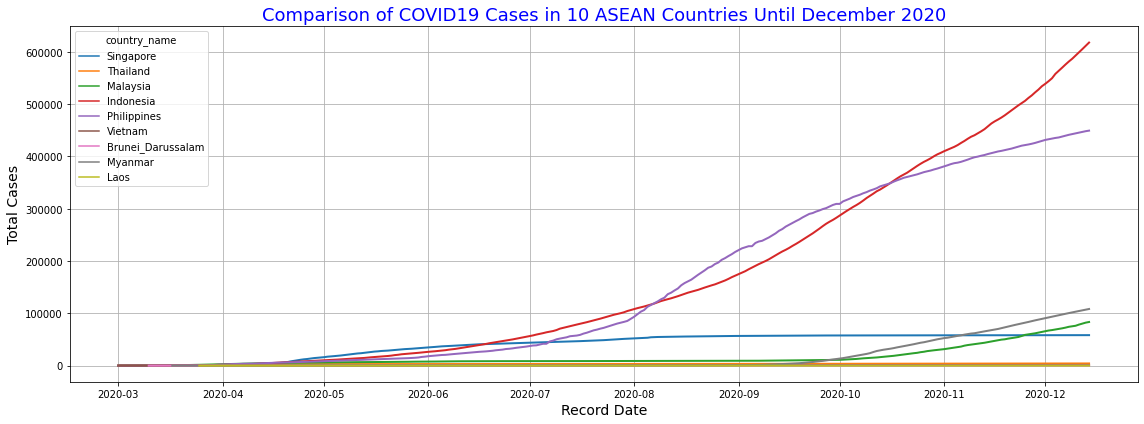

In [ ]:
import seaborn as sns
plt.figure(figsize=(16,6))
sns.lineplot(data=df_covid_denormalized_asean_march_onward, 
             x=df_covid_denormalized_asean_march_onward.index, 
             y="confirmed_cases", 
             hue="country_name",
             linewidth=2)
plt.xlabel('Record Date', fontsize=14)
plt.ylabel('Total Cases', fontsize=14)
plt.title('Comparison of COVID19 Cases in 10 ASEAN Countries Until December 2020', color="b", fontsize=18)
plt.grid()
plt.tight_layout()
plt.show()